### Jonathan Grundy HW6

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import datetime
import statsmodels.api as sma
import scipy
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.load('MTA_Fare.npy')

In [3]:
data = np.where(data < 0, 'NaN', data).astype(float)

## TASK 1

In [18]:
stations = np.nanmean(data, axis=(0,1))

In [5]:
time = pd.date_range('05/21/2010', periods=194, freq='w')

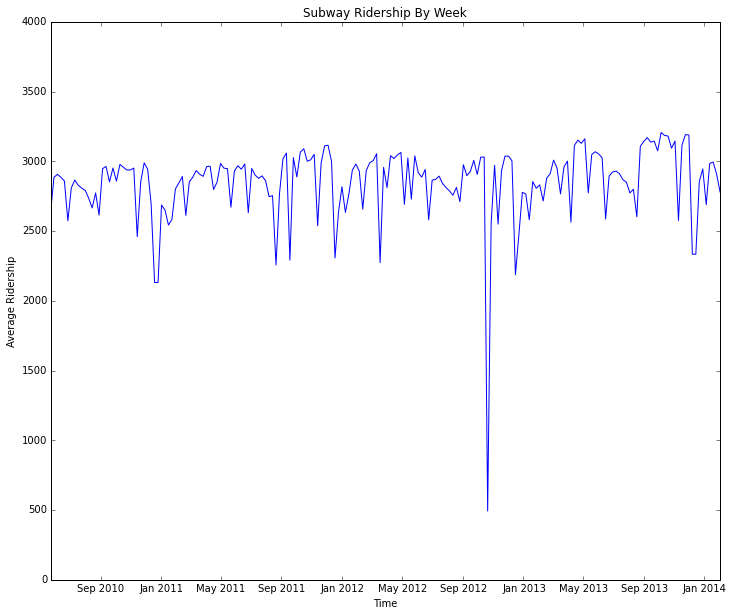

In [19]:
figure, ax = pl.subplots(figsize=(12,10))
ax.plot(time, np.transpose(stations))
ax.set_ylim(0,4000)
ax.set_title('Subway Ridership By Week')
pl.xlabel('Time')
pl.ylabel('Average Ridership')
#pl.ylabel

In [7]:
disaster_event = time[stations == min(stations)]

print disaster_event[0]

2012-10-21 00:00:00


The dip is due to Hurricane Sandy.

## TASK 2

In [74]:
#set up data
x = np.nanmean(data, axis = 0)
first10means = []
last10means = []

#take the mean of the means of the first 10 weeks for each ridertype
for i in arange(len(x)):
    first10means.append(np.nanmean(x[i][:10]))

#take the mean of the means of the last 10 weeks for each ridertype
for i in arange(len(x)):
    last10means.append(np.nanmean(x[i][-10:]))

print first10means
print last10means

#calculate the ratio
performance = np.divide(last10means, first10means)
print performance

[26679.372192905088, 1152.5385598947321, 107.82019153323286, 411.90584448530944, 103.6370426946784, 8501.1077179042513, 19700.974263490909, 23.72845207243676, 707.62432465915231, 1294.7483984113428, 89.142768484208759, 284.98496346302073, 0.012525170215604647, 296.67120792346032, 1823.7820622874635, 139.40532536404152, 67.433917761431246, 0.98048010212026748, 261.15739818211034, 45.660587933121128, 14.317519397471528, 1.0289081702754841, nan]
[27298.114440473408, 1444.9642443790008, 119.9858862468285, 385.14660480439312, 107.26512760800135, 11830.198747580713, 17751.245660099281, 0.0049760256157280192, 0.0075715582328589074, 0.0019466494628481671, 73.090841533308378, 346.31075937667839, 311.03116237851998, 171.92342831859588, 1186.3084975574548, 361.96838249525666, 196.45849503034489, 68.936148924295864, 400.67785075602268, 46.704914794916803, 11.598836646129133, 1.7128068945401911, 2311.9974547509901]
[  1.02319178e+00   1.25372312e+00   1.11283318e+00   9.35035543e-01
   1.03500761e+

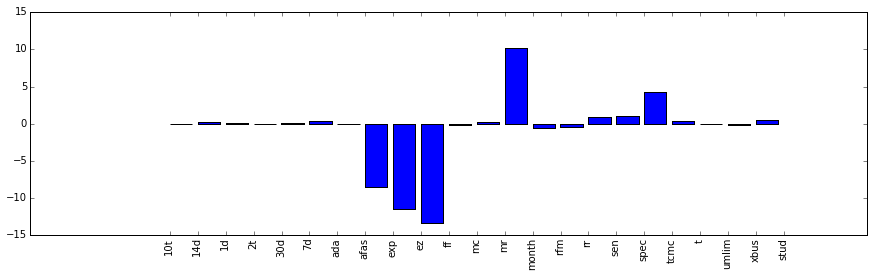

In [70]:
N = len(x)
labels = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

#graph of results in logspace
fig, ax = plt.subplots(figsize=(15,4))
width = 0.01;
tickLocations = np.arange(N)
rectLocations = tickLocations - (width/2.0)
ax.bar(rectLocations, log(performance))
ax.set_xticks(arange(23))
ax.set_xticklabels(labels, rotation='vertical')

In [80]:
for i in range(23):
    if performance[i] > 1:
        print "%s showed an increase of %f." % (labels[i], performance[i])
    elif performance[i] < 1:
        print "%s showed a decrease of %f." % (labels[i], performance[i])
    else:
        print "We have no information for %s" % (labels[i])

10t showed an increase of 1.023192.
14d showed an increase of 1.253723.
1d showed an increase of 1.112833.
2t showed a decrease of 0.935036.
30d showed an increase of 1.035008.
7d showed an increase of 1.391607.
ada showed a decrease of 0.901034.
afas showed a decrease of 0.000210.
exp showed a decrease of 0.000011.
ez showed a decrease of 0.000002.
ff showed a decrease of 0.819930.
mc showed an increase of 1.215190.
mr showed an increase of 24832.489860.
month showed a decrease of 0.579508.
rfm showed a decrease of 0.650466.
rr showed an increase of 2.596518.
sen showed an increase of 2.913348.
spec showed an increase of 70.308565.
tcmc showed an increase of 1.534239.
t showed an increase of 1.022872.
umlim showed a decrease of 0.810115.
xbus showed an increase of 1.664684.
We have no information for stud


## TASK 3

In [20]:
#set up the data for the fourier transformation
y = np.nanmean(data, axis = 1)
N = len(y[0])
period = 52.

194
(600, 194)


[  inf  194.]
[ 2.04210526  2.02083333]


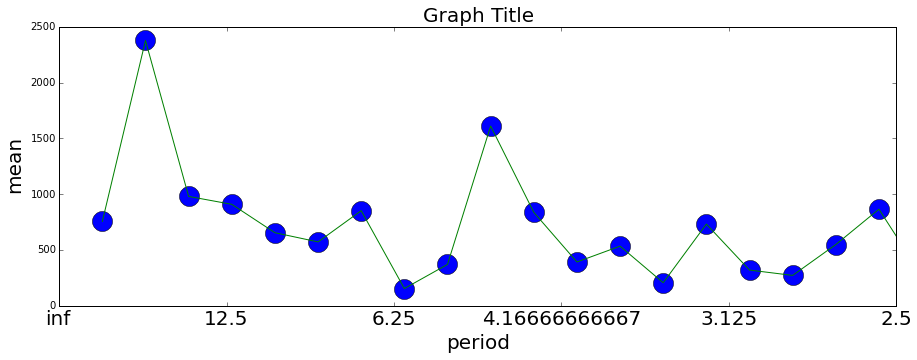

In [21]:
#apply the fourier transformation
f = np.abs(np.fft.rfft(y[2]))

#reuse of lab code to visualize what a fourier transformation would look like
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
print (1.0/np.fft.rfftfreq(N, 1.0)[0:2])
print (1.0/np.fft.rfftfreq(N, 1.0)[-3:-1])
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/10)
ax.set_xticklabels([ "%s"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
plt.xlabel("period", fontsize=20)
plt.ylabel("mean", fontsize=20)
plt.title("Graph Title", fontsize=20)

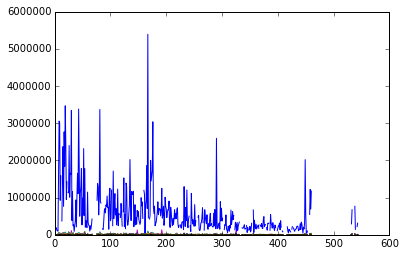

In [12]:
#apply the fourier transformation for every station
f = np.abs(np.fft.rfft(y[2:]))
plt.plot(f)

In [125]:
#calculate which stations have the largest periodicity by examining how much they deviate from their mean
#the theory behind this method is that it processes quickly and doesn't rely on a visual analysis of the graphs
fscore = []

for i in range(600):
    value = np.abs(np.fft.rfft(y[i])[51])
    fscore.append(value)

In [131]:
#convert results to a dataframe for sorting
df = pd.DataFrame(fscore)

#sort results by periodicity
dfsort = df.sort([0], ascending = False)

print dfsort

                0
32   21971.484011
21   19241.214662
169  18250.071723
239  13628.154265
11   13303.124388
83   12874.575868
178  12577.694258
9    12409.722991
19   12197.932200
45   12048.803649
10   11882.526884
460  10805.489908
22   10717.063916
267  10111.157174
56    9423.971411
137   9280.079490
28    8841.836438
292   8507.814527
16    8365.379273
20    8192.463488
451   7929.135517
54    7832.617851
150   7828.513921
85    7529.415476
13    7425.857699
194   7391.129923
61    7197.051806
174   6918.827312
200   6897.631934
101   6640.374246
..            ...
570           NaN
571           NaN
572           NaN
573           NaN
574           NaN
575           NaN
576           NaN
577           NaN
578           NaN
579           NaN
580           NaN
581           NaN
582           NaN
583           NaN
584           NaN
585           NaN
586           NaN
587           NaN
588           NaN
589           NaN
590           NaN
591           NaN
592           NaN
593       

/Users/jgrundy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


The four stations with the greatest periodicity (by index) are: 32, 21, 169, 239.